In [22]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm    

In [23]:
telco_df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')


In [24]:
telco_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [25]:
telco_df.TotalCharges = pd.to_numeric(telco_df.TotalCharges, errors='coerce')
telco_df['TotalCharges'].dtypes

dtype('float64')

In [26]:
telco_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [27]:
telco_df.dropna(inplace=True)
telco_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [28]:
df_cleaned = telco_df.drop(['customerID'], axis=1)


In [29]:
for item in df_cleaned.columns:
    try:
        df_cleaned[item] = df_cleaned[item].str.lower()
    except:
        print(item, "couldn't convert")


SeniorCitizen couldn't convert
tenure couldn't convert
MonthlyCharges couldn't convert
TotalCharges couldn't convert


In [30]:
columns_to_convert = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for item in columns_to_convert:
    df_cleaned[item].replace(to_replace='yes', value=1, inplace=True)
    df_cleaned[item].replace(to_replace='no',  value=0, inplace=True)


Text(0.5, 1, 'Correlation Heatmap')

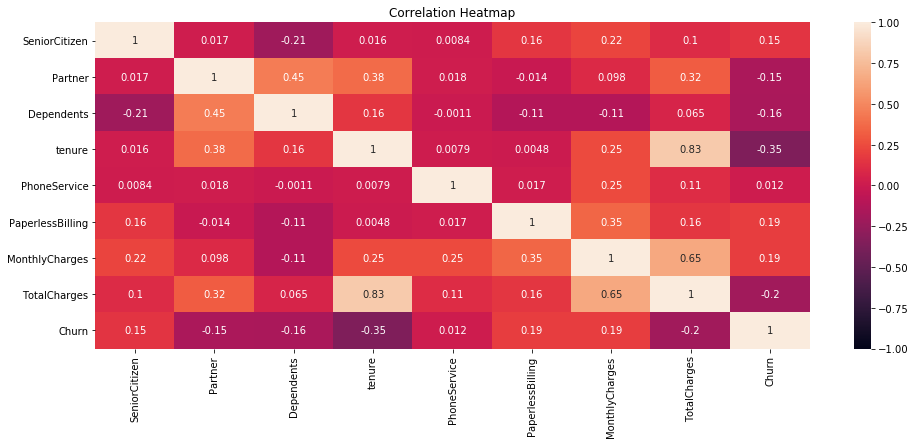

In [31]:
corr_mat = df_cleaned.corr()
plt.figure(figsize=(16, 6))
heat_map = sns.heatmap(corr_mat, vmin=-1, vmax=1, annot=True)
heat_map.set_title('Correlation Heatmap')

In [32]:
df_lr = df_cleaned.drop('gender', 1)


In [33]:
df_dummies = pd.get_dummies(df_lr)


In [34]:
X = df_dummies.drop('Churn', 1)
y = df_dummies['Churn']

In [35]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [36]:
# import the class
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

In [37]:
# fit the model with data
logreg.fit(X_train,y_train)

/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
y_pred=logreg.predict(X_test)

In [39]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1180,  131],
       [ 207,  240]])

Text(0.5, 257.44, 'Predicted label')

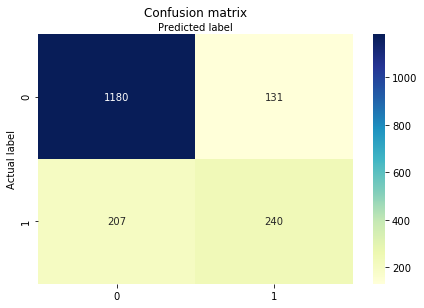

In [40]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [41]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8077360637087599
Precision: 0.6469002695417789
Recall: 0.5369127516778524


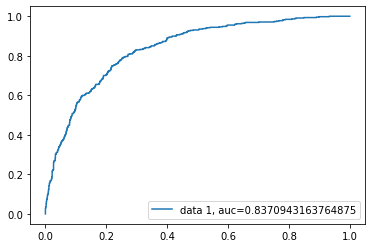

In [42]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()